In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [2]:
base_dir = "../data/leapGestRecog/00"


In [3]:
gesture_folders = sorted(os.listdir(base_dir))
gesture_folders


['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

In [4]:
label_map = {gesture: idx for idx, gesture in enumerate(gesture_folders)}
label_map


{'01_palm': 0,
 '02_l': 1,
 '03_fist': 2,
 '04_fist_moved': 3,
 '05_thumb': 4,
 '06_index': 5,
 '07_ok': 6,
 '08_palm_moved': 7,
 '09_c': 8,
 '10_down': 9}

In [5]:
def load_gesture_images(base_dir, label_map, img_size=64, max_images_per_class=150):
    data = []
    
    for gesture, label in label_map.items():
        gesture_path = os.path.join(base_dir, gesture)
        count = 0
        
        for img_name in os.listdir(gesture_path):
            if count >= max_images_per_class:
                break
            
            img_path = os.path.join(gesture_path, img_name)
            
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (img_size, img_size))
                img = img.flatten()
                
                data.append([img, label])
                count += 1
            except:
                pass
    
    return data


In [6]:
gesture_data = load_gesture_images(base_dir, label_map)
len(gesture_data)


1500

In [7]:
import random
random.shuffle(gesture_data)


In [8]:
X = np.array([item[0] for item in gesture_data])
y = np.array([item[1] for item in gesture_data])

X.shape, y.shape


((1500, 4096), (1500,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((1200, 4096), (300, 4096))

In [10]:
gesture_model = SVC(kernel='linear', random_state=42)
gesture_model.fit(X_train, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [11]:
y_pred = gesture_model.predict(X_test)


In [12]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0


In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        36
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        35
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        30

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [15]:
import pandas as pd

results = pd.DataFrame({
    "Actual_Label": y_test,
    "Predicted_Label": y_pred
})

results.to_csv("../outputs/gesture_predictions.csv", index=False)


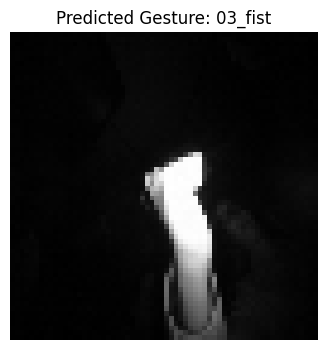

In [18]:
sample_img = X_test[7].reshape(64, 64)
predicted_label = y_pred[0]

# Get gesture name from label
inv_label_map = {v: k for k, v in label_map.items()}
gesture_name = inv_label_map[predicted_label]

plt.figure(figsize=(4, 4))
plt.imshow(sample_img, cmap='gray')
plt.title(f"Predicted Gesture: {gesture_name}")
plt.axis('off')

plt.savefig("../figures/sample_gesture_prediction.png")
plt.show()
